# pvfactors

In [1]:
import utils
from bokeh.io import output_notebook
from bokeh.plotting import show

In [2]:
output_notebook()

Loading BokehJS ...

## GitHub

In [3]:
gh = utils.get_github_stars('sunpower/pvfactors')

In [4]:
p = utils.plot_github_stars_timeseries(gh)
show(p)

In [5]:
contributor_ts, _ = utils.get_github_contributor_timeseries("sunpower/pvfactors")
p = utils.plot_github_contributors_timeseries(contributor_ts)
show(p)

In [6]:
contributors = utils.get_github_contributors('sunpower/pvfactors')

ValueError: Could not save to JPEG for display

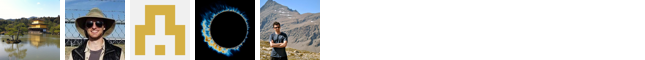

In [7]:
mosaic = utils.make_github_contributors_mosaic(contributors)
mosaic